## import 需要的库

In [11]:
import pandas as pd
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
import shutil

import utils
import importlib
importlib.reload(utils)

# TODO:show some images for every category after categorizing

<module 'utils' from 'E:\\My_study_place\\python\\jupyter\\kaggle\\Human Protein Atlas Image Classification\\utils.py'>

## Categorize图片
- 读取categories from file categories.txt
- 将训练数据按其对应的category分好，如果一个sample有多个category,则在每个category目录下这个sample都要出现
```E:\MY_STUDY_PLACE\PYTHON\JUPYTER\KAGGLE
├─.ipynb_checkpoints
└─categorizedTrain
    ├─Actin filaments
    ├─Aggresome
    ├─Cell junctions
    ├─Centrosome
    ├─Cytokinetic bridge
    ├─Cytoplasmic bodies
    ├─Cytosol
    ├─Endoplasmic reticulum
    ├─Endosomes
    ├─Focal adhesion sites
    ├─Golgi apparatus
    ├─Intermediate filaments
    ├─Lipid droplets
    ├─Lysosomes
    ├─Microtubule ends
    ├─Microtubule organizing center
    ├─Microtubules
    ├─Mitochondria
    ├─Mitotic spindle
    ├─Nuclear bodies
    ├─Nuclear membrane
    ├─Nuclear speckles
    ├─Nucleoli
    ├─Nucleoli fibrillar center
    ├─Nucleoplasm
    ├─Peroxisomes
    ├─Plasma membrane
    └─Rods & rings
```


In [12]:
# test
categories = utils.readCategories()
print(categories)

(28, 2)
{0: {'name': 'Nucleoplasm'}, 1: {'name': 'Nuclear membrane'}, 2: {'name': 'Nucleoli'}, 3: {'name': 'Nucleoli fibrillar center'}, 4: {'name': 'Nuclear speckles'}, 5: {'name': 'Nuclear bodies'}, 6: {'name': 'Endoplasmic reticulum'}, 7: {'name': 'Golgi apparatus'}, 8: {'name': 'Peroxisomes'}, 9: {'name': 'Endosomes'}, 10: {'name': 'Lysosomes'}, 11: {'name': 'Intermediate filaments'}, 12: {'name': 'Actin filaments'}, 13: {'name': 'Focal adhesion sites'}, 14: {'name': 'Microtubules'}, 15: {'name': 'Microtubule ends'}, 16: {'name': 'Cytokinetic bridge'}, 17: {'name': 'Mitotic spindle'}, 18: {'name': 'Microtubule organizing center'}, 19: {'name': 'Centrosome'}, 20: {'name': 'Lipid droplets'}, 21: {'name': 'Plasma membrane'}, 22: {'name': 'Cell junctions'}, 23: {'name': 'Mitochondria'}, 24: {'name': 'Aggresome'}, 25: {'name': 'Cytosol'}, 26: {'name': 'Cytoplasmic bodies'}, 27: {'name': 'Rods & rings'}}


In [13]:
# Test
labels = utils.readLabels(r"H:\all\train.csv")

                                     Id    targetList
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       [16, 0]
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0           [5]
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0           [1]
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0          [18]


In [14]:
def categorizeTrainingData(categories, trainDataPath="./train", trainLabelFile="./train.csv", rootPath=".\categorizedTrain", maxSize=-1):
    """
    # Description: categorize the training data based on categories
    # Arguments:
        categories: dict of categories: {index:{'name':value}}
        trainDataPath: the path that the training data are located
        trainLabelFile: the file in which the training data's labels are saved
        rootPath: rootPath where save the training data to, default is ".\categorizedTrain".
        maxSize: the maxSize that are categorized for the following work.
    # Returns:
        None
    # Raises:
        None
    """
    # create the category directory
    for key,category in categories.items():
        categoryPath = os.path.join(rootPath, category['name'])
        utils.rebuildDir(categoryPath)

    # read the trainLabels from trainLebelFile

    labels = utils.readLabels(trainLabelFile)
    count = 0;
    for label in labels:
        # print(label)
        sampleId = label['Id']
        targetList = label['targetList']
        for targetId in targetList:
            categoryName = categories[int(targetId)]['name']
            categorizedDir = os.path.join(rootPath, categoryName)
            # print(sampleId, targetId, categoryName)
            # move file to categorized dir
            try:
                shutil.copy(os.path.join(trainDataPath, sampleId + "_green.png"), categorizedDir)
                shutil.copy(os.path.join(trainDataPath, sampleId + "_red.png"), categorizedDir)
                shutil.copy(os.path.join(trainDataPath, sampleId + "_blue.png"), categorizedDir)
                shutil.copy(os.path.join(trainDataPath, sampleId + "_yellow.png"), categorizedDir)
            except FileNotFoundError:
                pass
        count +=1
        if maxSize >=0 and count >= maxSize:
            break
        
# test
trainSize = 5000
categorizeTrainingData(categories, trainDataPath=r"H:\all\train", trainLabelFile=r"H:\all\train.csv", maxSize=trainSize)

                                     Id    targetList
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       [16, 0]
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0           [5]
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0           [1]
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0          [18]


## Expore the training data

total # of training data is:  5000
{'Cytokinetic bridge': 13, 'Endoplasmic reticulum': 16, 'Cytoplasmic bodies': 9, 'Peroxisomes': 1, 'Rods & rings': 1, 'Lysosomes': 2, 'Plasma membrane': 82, 'Mitotic spindle': 8, 'Nuclear bodies': 52, 'Actin filaments': 12, 'Cytosol': 171, 'Mitochondria': 50, 'Centrosome': 21, 'Intermediate filaments': 20, 'Nucleoli': 59, 'Lipid droplets': 4, 'Microtubule organizing center': 21, 'Endosomes': 2, 'Cell junctions': 9, 'Nucleoli fibrillar center': 38, 'Golgi apparatus': 49, 'Nuclear speckles': 38, 'Microtubule ends': 0, 'Nuclear membrane': 15, 'Nucleoplasm': 239, 'Focal adhesion sites': 7, 'Aggresome': 2, 'Microtubules': 19}
dict_keys(['Cytokinetic bridge', 'Endoplasmic reticulum', 'Cytoplasmic bodies', 'Peroxisomes', 'Rods & rings', 'Lysosomes', 'Plasma membrane', 'Mitotic spindle', 'Nuclear bodies', 'Actin filaments', 'Cytosol', 'Mitochondria', 'Centrosome', 'Intermediate filaments', 'Nucleoli', 'Lipid droplets', 'Microtubule organizing center', 'Endoso

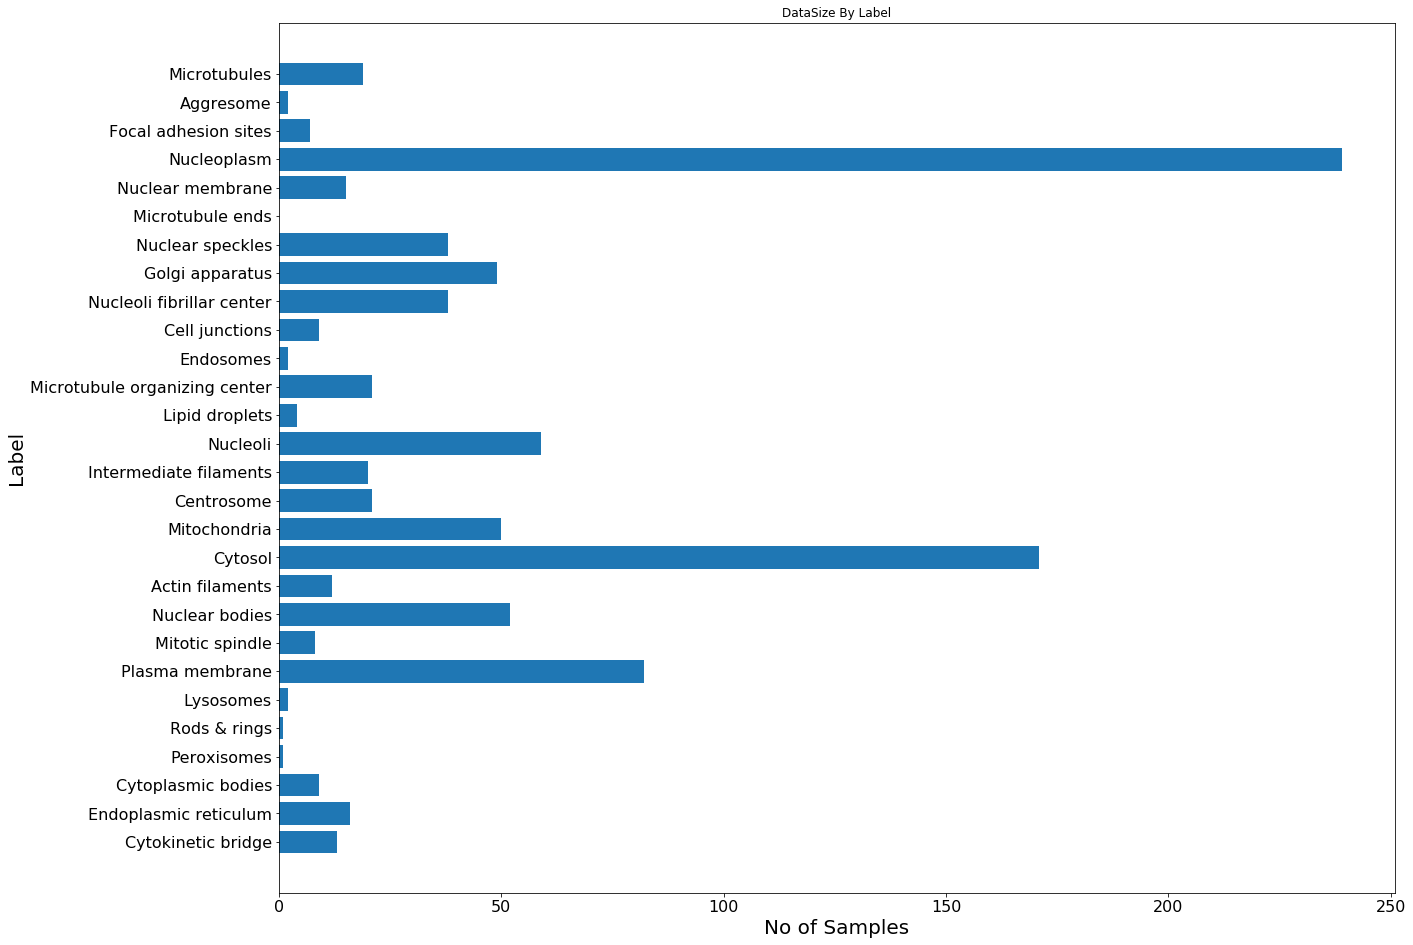

In [15]:
# print the training data size and count the sample numbers based on labels
print("total # of training data is: ", trainSize)
def getDataSizeByLabel(dataPath="./"):
    """
    # Description: get number of data based on different labels
    # Arguments:
        dataPath: the path that the training data are located, must categorized by labels
    # Return:
        dataSize: dictionary of data Size {label:size}
    # Raises:
        None
    """
    dataSize = {}
    for fileName in os.listdir(dataPath):
        numberOfSample = len(fnmatch.filter(os.listdir(os.path.join(dataPath, fileName)), '*_green.png'))
        dataSize[fileName] = numberOfSample
    return dataSize

def plotDataSizeByLabel(dataSize):
    """
    # Description: plot a bar chart of the dataSize by Label
    # Arguments:
        dataSize:dictionary of data Size {label:size}
    # Return:
        None
    # Raises:
        None
    """
    # this is for plotting purpose
    index = np.arange(len(dataSize))
    labelNames = dataSize.keys()
    labelValues = dataSize.values()
    print(labelNames)
    print(labelValues)
    plt.figure(figsize=(20,16))
    plt.tick_params(labelsize=16)
    plt.barh(index, labelValues, align="center")
    plt.ylabel('Label', fontsize=20)
    plt.xlabel('No of Samples', fontsize=20)
    plt.yticks(index, labelNames, fontsize=16, rotation=0)
    plt.title('DataSize By Label')
    plt.show()
        
dataSize = getDataSizeByLabel("./categorizedTrain")
print(dataSize)
plotDataSizeByLabel(dataSize)

we can see the distribution of the sample size is skew badly